<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [8]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB
None

Summary Statistics:

       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.0

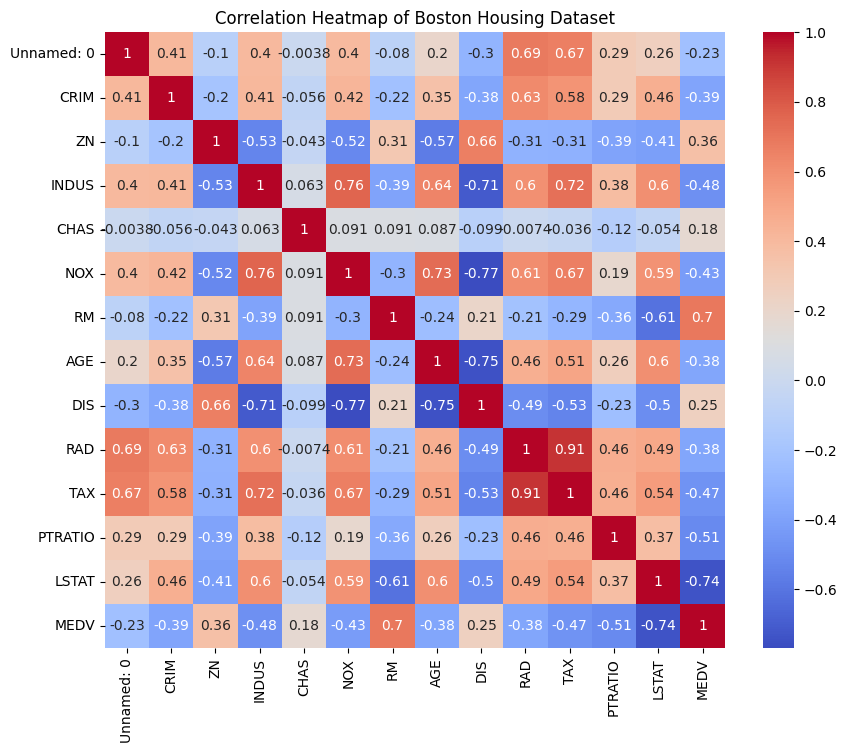

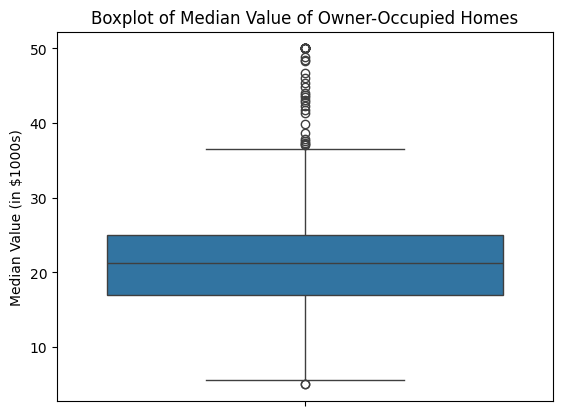

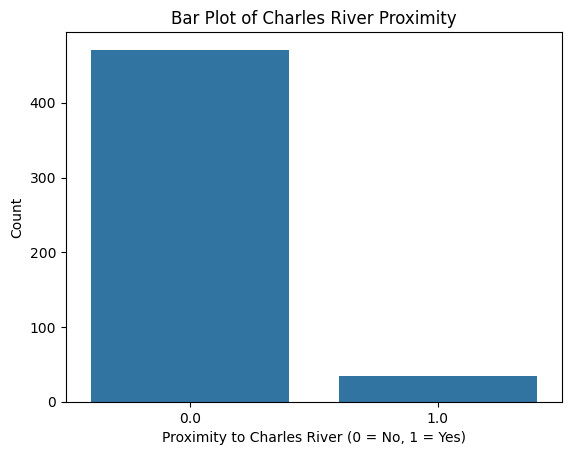

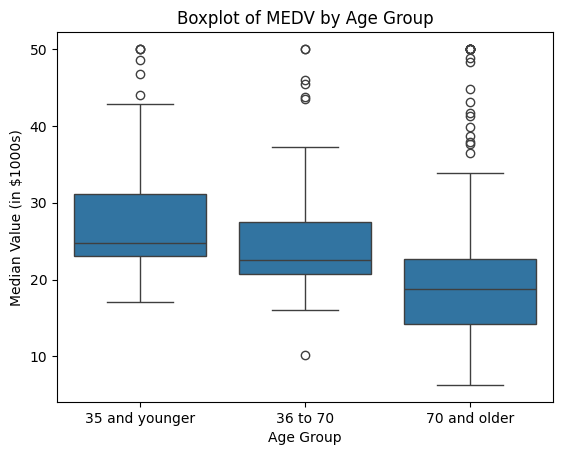

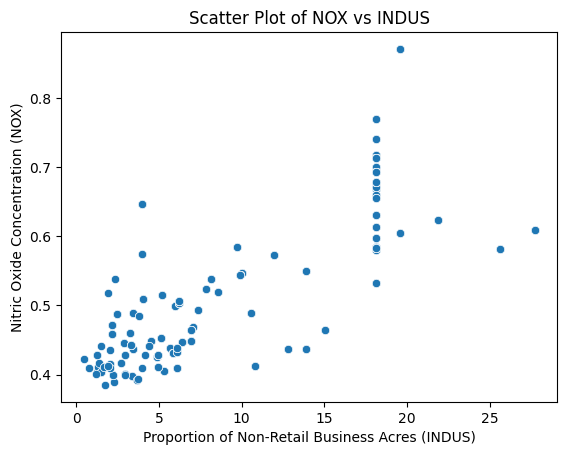

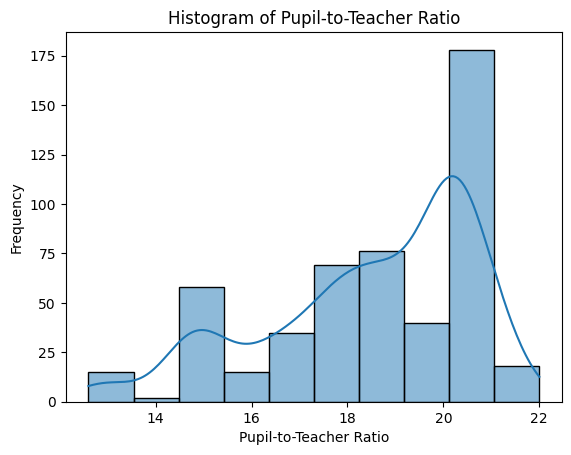

T-Test Results:
T-Statistic: 3.996437466090509, P-Value: 7.390623170519905e-05
Reject the null hypothesis: Significant difference exists.

ANOVA Results:
F-Statistic: 30.566839914861454, P-Value: 3.435569235360708e-13
Reject the null hypothesis: Significant differences exist.

Pearson Correlation Results:
Correlation: 0.7636514469209192, P-Value: 7.913361061210442e-98
Reject the null hypothesis: Significant correlation exists.

Regression Analysis Results:

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 23 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        23:05:34   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                    

In [9]:
# --- Task 1: Familiarize Yourself with the Dataset ---

print("Dataset Overview:\n")
print(boston_df.info())  
print("\nSummary Statistics:\n")
print(boston_df.describe())  

print("\nMissing Values:\n")
print(boston_df.isnull().sum()) 


plt.figure(figsize=(10, 8))
sns.heatmap(boston_df.corr(), annot=True, cmap="coolwarm")  
plt.title("Correlation Heatmap of Boston Housing Dataset")
plt.show()

# --- Task 2: Descriptive Statistics and Visualizations ---

sns.boxplot(data=boston_df, y='MEDV')  
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value (in $1000s)')
plt.show()

sns.countplot(data=boston_df, x='CHAS')  
plt.title('Bar Plot of Charles River Proximity')
plt.xlabel('Proximity to Charles River (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

bins = [0, 35, 70, 100]
labels = ['35 and younger', '36 to 70', '70 and older']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False) 

sns.boxplot(data=boston_df, x='AGE_Group', y='MEDV') 
plt.title('Boxplot of MEDV by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value (in $1000s)')
plt.show()

sns.scatterplot(data=boston_df, x='INDUS', y='NOX') 
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.show()

sns.histplot(data=boston_df, x='PTRATIO', bins=10, kde=True)  
plt.title('Histogram of Pupil-to-Teacher Ratio')
plt.xlabel('Pupil-to-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

# --- Task 3: Statistical Tests ---
charles_yes = boston_df[boston_df['CHAS'] == 1]['MEDV'] 
charles_no = boston_df[boston_df['CHAS'] == 0]['MEDV']  

t_stat, p_val = scipy.stats.ttest_ind(charles_yes, charles_no)
print(f"T-Test Results:\nT-Statistic: {t_stat}, P-Value: {p_val}")
if p_val < 0.05:
    print("Reject the null hypothesis: Significant difference exists.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

group1 = boston_df[boston_df['AGE_Group'] == '35 and younger']['MEDV']  
group2 = boston_df[boston_df['AGE_Group'] == '36 to 70']['MEDV']  
group3 = boston_df[boston_df['AGE_Group'] == '70 and older']['MEDV']  

f_stat, p_val = scipy.stats.f_oneway(group1, group2, group3)
print(f"\nANOVA Results:\nF-Statistic: {f_stat}, P-Value: {p_val}")
if p_val < 0.05:
    print("Reject the null hypothesis: Significant differences exist.")
else:
    print("Fail to reject the null hypothesis: No significant differences.")

corr, p_val = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])  
print(f"\nPearson Correlation Results:\nCorrelation: {corr}, P-Value: {p_val}")
if p_val < 0.05:
    print("Reject the null hypothesis: Significant correlation exists.")
else:
    print("Fail to reject the null hypothesis: No significant correlation.")


X = boston_df['DIS']  
y = boston_df['MEDV']  
X = sm.add_constant(X)  

model = sm.OLS(y, X).fit()
print("\nRegression Analysis Results:\n")
print(model.summary())
